In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# load csv file using pd.read_csv

df=pd.read_csv("Automobile_data.xls")

In [3]:
# head() used to Show first five rows in he dataset
# df
df.head()
# df.tail()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
# sum of null values in dataset

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
# It gives a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [6]:
# Used to show statistical summary

df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


**Cleaning of the Data**

In [7]:
# To replace "?" with np.nan 

df.replace("?", np.nan, inplace=True)

In [8]:
# Convert the columns in numeric values 

cols = ["normalized-losses","price", "horsepower", "engine-size", "city-mpg", "highway-mpg"]

for col in cols :
    df[col]=pd.to_numeric(df[col] , errors="coerce")

In [9]:
# Drop rows with missing price

df=df.dropna(subset=['price'])

In [10]:
#  Fill missing numeric values with mean


for col in cols:
    df[col].fillna(df[col].mean(),inplace=True)

In [11]:
# Remove duplicate rows


df.drop_duplicates(inplace=True)

In [ ]:
# To show correlation between variables
# To identify strong and weak relationships
# Dark color = strong relation, light color = weak relation

In [13]:
num_cols = df.select_dtypes(include=["int64","float64"])

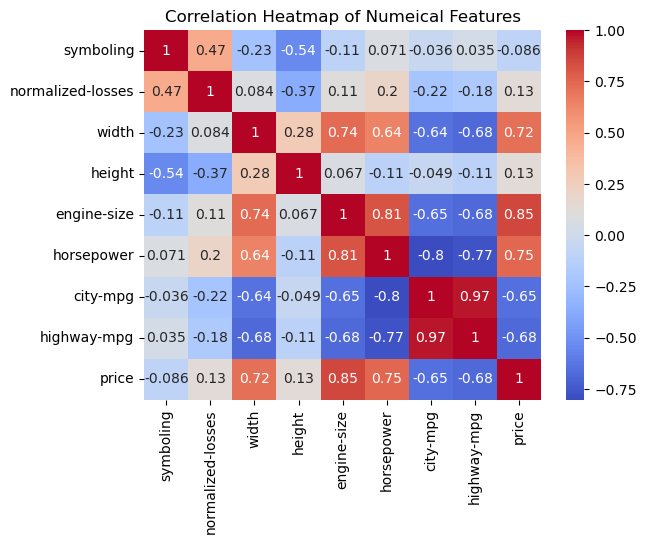

In [14]:
# plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Numeical Features")
plt.show()

In [ ]:
# To compare values between different categories
# Used for categorical data

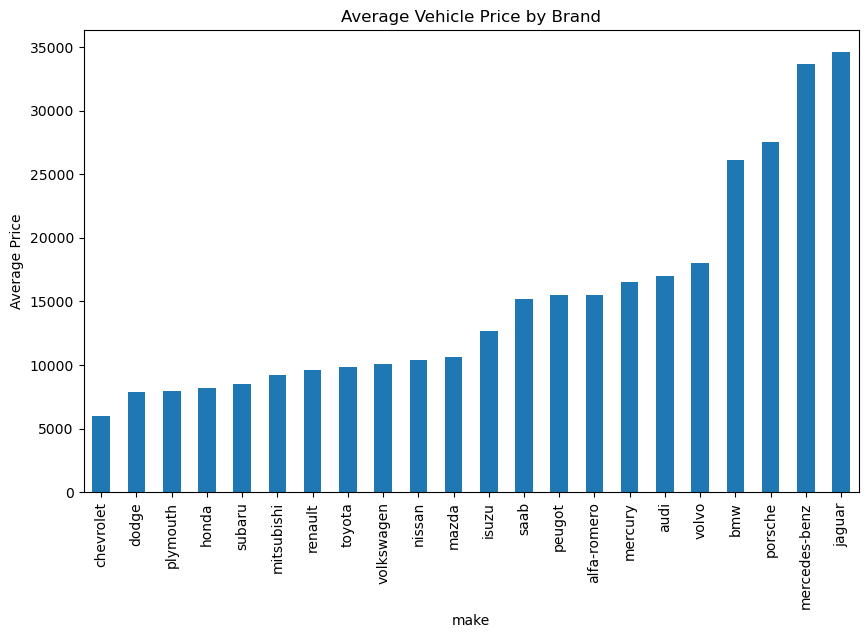

In [15]:
avg_price_make=df.groupby("make")["price"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price_make.plot(kind="bar")
plt.ylabel("Average Price")
plt.title("Average Vehicle Price by Brand")
plt.show()

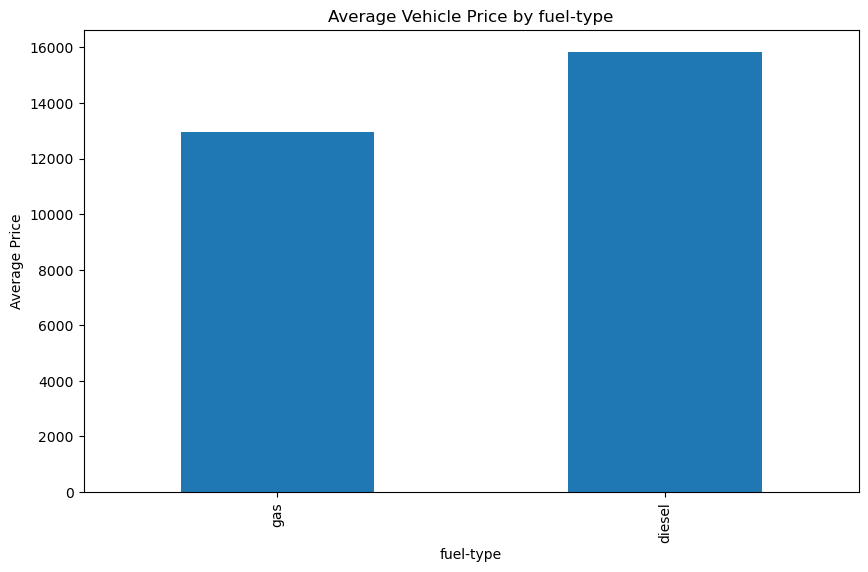

In [16]:
avg_price_fuel_type=df.groupby("fuel-type")["price"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price_fuel_type.plot(kind="bar")
plt.ylabel("Average Price")
plt.title("Average Vehicle Price by fuel-type")
plt.show()

In [ ]:
# To show data distribution
# To find outliers

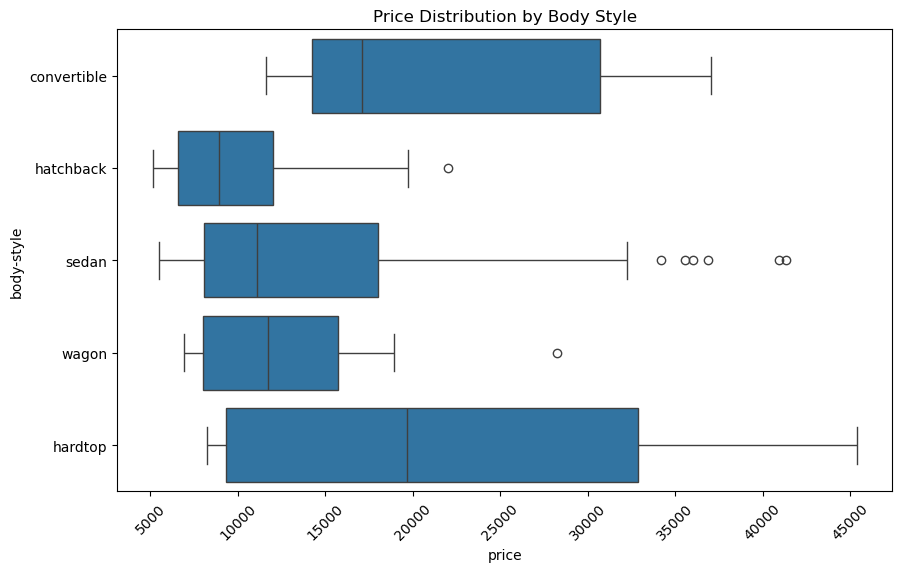

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="price", y="body-style", data=df)
plt.title("Price Distribution by Body Style")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# To show relationship between two numerical variables
# To check positive or negative correlation

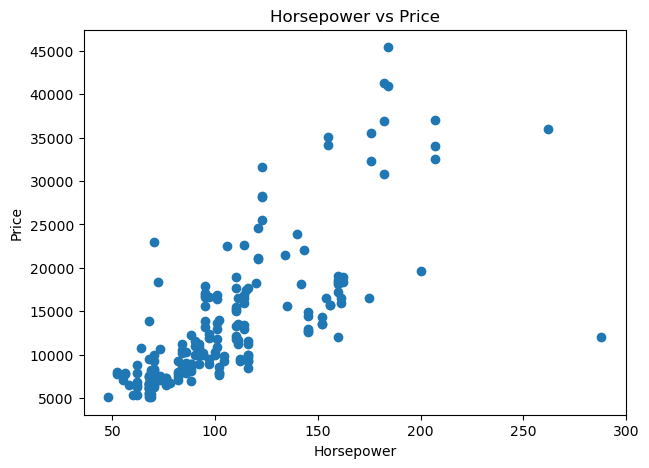

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(df["horsepower"], df["price"])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.show()

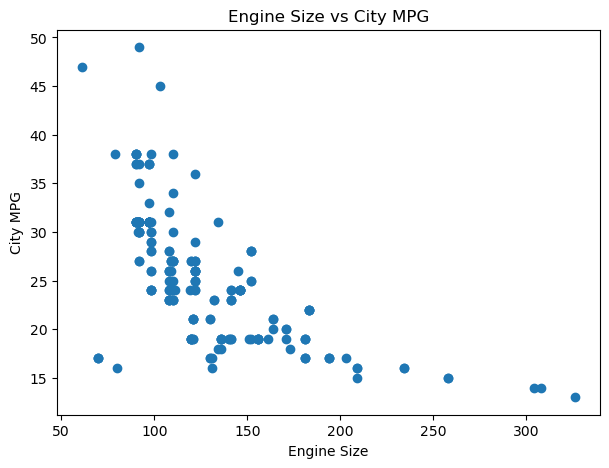

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(df["engine-size"],df["city-mpg"])
plt.xlabel("Engine Size")
plt.ylabel("City MPG")
plt.title("Engine Size vs City MPG")
plt.show()
           

In [ ]:
# To show relationships between multiple variables at once
# Combines scatter plots and histograms
# Useful for Exploratory Data Analysis (EDA)

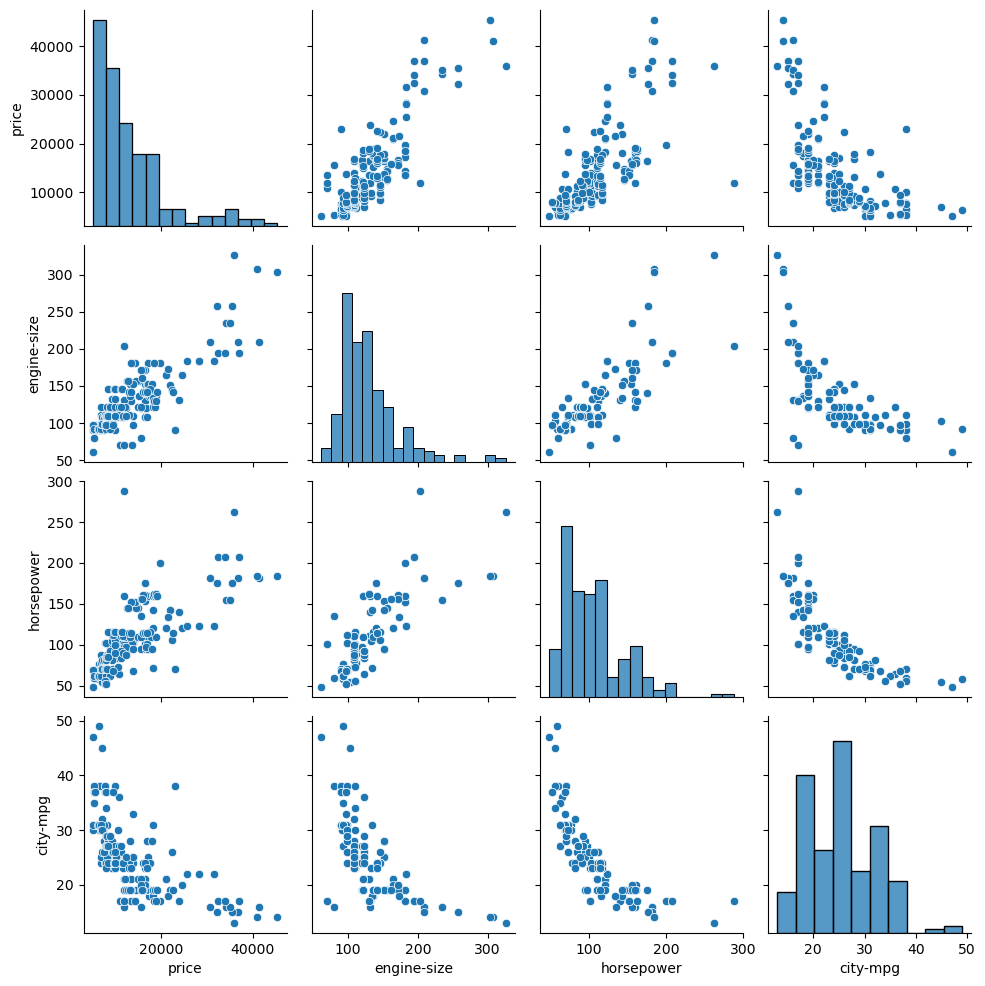

In [20]:
sns.pairplot(df[["price", "engine-size", "horsepower", "city-mpg"]])
plt.show()
